# ML Zoomcamp Cohort 2024
# Homework 6

Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error
import xgboost as xgb

### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

```bash
wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
```

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).

In [2]:
# !wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

In [3]:
df_jamb = pd.read_csv("../data/jamb_exam_results.csv")
df_jamb.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


### Preparing the dataset 

First, let's make the names lowercase:

```python
df.columns = df.columns.str.lower().str.replace(' ', '_')
```

In [4]:
df_jamb.columns = df_jamb.columns.str.lower().str.replace(' ', '_')
df_jamb.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,student_id,age,gender,socioeconomic_status,parent_education_level,assignments_completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


Preparation:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [5]:
df_jamb.isna().any()

jamb_score                      False
study_hours_per_week            False
attendance_rate                 False
teacher_quality                 False
distance_to_school              False
school_type                     False
school_location                 False
extra_tutorials                 False
access_to_learning_materials    False
parent_involvement              False
it_knowledge                    False
student_id                      False
age                             False
gender                          False
socioeconomic_status            False
parent_education_level           True
assignments_completed           False
dtype: bool

In [6]:
df_jamb['parent_education_level'].isna().sum()

np.int64(891)

In [7]:
df_jamb_prep = df_jamb.drop(columns='student_id')
df_jamb_prep = df_jamb_prep.fillna(0)

In [8]:
df_full_train, df_test = train_test_split(
    df_jamb_prep, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(
    df_full_train, test_size=0.25, random_state=1)

X_train = df_train.drop(columns=["jamb_score"])
y_train = df_train["jamb_score"]

X_val = df_val.drop(columns=["jamb_score"])
y_val = df_val["jamb_score"]

X_test = df_test.drop(columns=["jamb_score"])
y_test = df_test["jamb_score"]


# Output the shapes of the splits to verify
print(
    f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}"
)

Train set: (3000, 15), Validation set: (1000, 15), Test set: (1000, 15)


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 4740 to 357
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   study_hours_per_week          3000 non-null   int64  
 1   attendance_rate               3000 non-null   int64  
 2   teacher_quality               3000 non-null   int64  
 3   distance_to_school            3000 non-null   float64
 4   school_type                   3000 non-null   object 
 5   school_location               3000 non-null   object 
 6   extra_tutorials               3000 non-null   object 
 7   access_to_learning_materials  3000 non-null   object 
 8   parent_involvement            3000 non-null   object 
 9   it_knowledge                  3000 non-null   object 
 10  age                           3000 non-null   int64  
 11  gender                        3000 non-null   object 
 12  socioeconomic_status          3000 non-null   object 
 13  parent

In [10]:
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X_train.select_dtypes(include="number").columns.to_list()

# Convert DataFrames to dictionaries
train_dict = X_train[categorical_cols + numerical_cols].to_dict(orient="records")
val_dict = X_val[categorical_cols + numerical_cols].to_dict(orient="records")

# Initialize the DictVectorizer
dv = DictVectorizer(sparse=True)

# Fit and transform the training data
X_train_encoded = dv.fit_transform(train_dict)

# Transform the validation data
X_val_encoded = dv.transform(val_dict)

## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

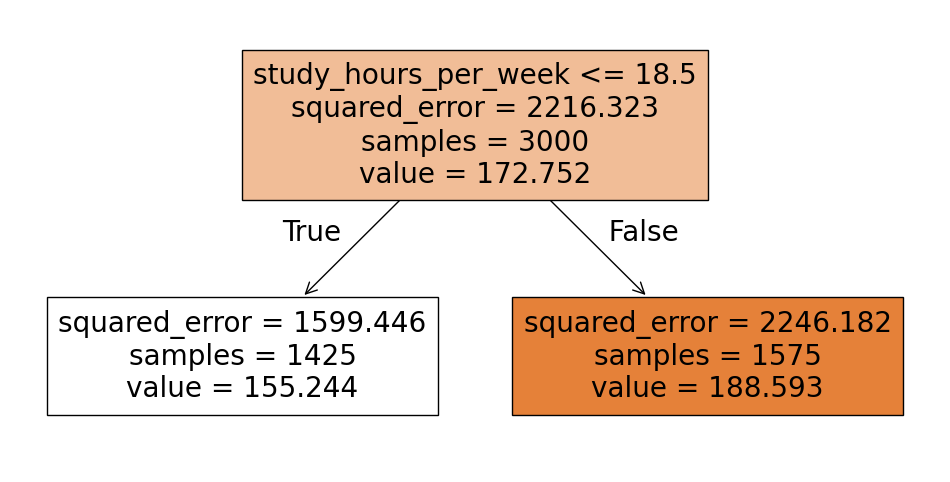

The feature used for splitting is: study_hours_per_week


In [11]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train_encoded, y_train)

# Get the feature names from the DictVectorizer
feature_names = dv.get_feature_names_out()

# Plot the tree to visualize the splitting feature
plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=feature_names, filled=True)
plt.show()

# Alternatively, inspect the feature used for the split
split_feature_index = regressor.tree_.feature[0]
split_feature = feature_names[split_feature_index]
print(f"The feature used for splitting is: {split_feature}")

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12


In [12]:
# Train the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf_regressor.fit(X_train_encoded, y_train)

# Predict using the validation features
y_pred = rf_regressor.predict(X_val_encoded)

# Compute RMSE
rmse = root_mean_squared_error(y_val, y_pred)
print(f"RMSE: {rmse:.2f}")

RMSE: 42.14


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200


In [13]:
# List to store RMSE values
rmse_list = []

# Range of n_estimators to try
n_estimators_list = range(10, 201, 10)

for n in n_estimators_list:
    # Initialize the Random Forest regressor with current n_estimators
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf_regressor.fit(X_train_encoded, y_train)

    # Predict on validation set
    y_pred = rf_regressor.predict(X_val_encoded)

    # Compute RMSE
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_list.append(rmse)

    print(f"n_estimators: {n}, RMSE: {rmse:.3f}")

n_estimators: 10, RMSE: 42.137
n_estimators: 20, RMSE: 41.461
n_estimators: 30, RMSE: 41.106
n_estimators: 40, RMSE: 40.917
n_estimators: 50, RMSE: 40.852
n_estimators: 60, RMSE: 40.784
n_estimators: 70, RMSE: 40.677
n_estimators: 80, RMSE: 40.539
n_estimators: 90, RMSE: 40.504
n_estimators: 100, RMSE: 40.517
n_estimators: 110, RMSE: 40.593
n_estimators: 120, RMSE: 40.625
n_estimators: 130, RMSE: 40.651
n_estimators: 140, RMSE: 40.595
n_estimators: 150, RMSE: 40.597
n_estimators: 160, RMSE: 40.604
n_estimators: 170, RMSE: 40.628
n_estimators: 180, RMSE: 40.641
n_estimators: 190, RMSE: 40.631
n_estimators: 200, RMSE: 40.601


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25


In [14]:
# Parameters
max_depth_list = [10, 15, 20, 25]
n_estimators_list = range(10, 201, 10)

# Dictionary to store mean RMSE for each max_depth
mean_rmse_per_depth = {}

for max_depth in max_depth_list:
    rmse_list = []
    print(f"\nEvaluating max_depth = {max_depth}")
    for n_estimators in n_estimators_list:
        # Initialize and train the Random Forest regressor
        rf_regressor = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        rf_regressor.fit(X_train_encoded, y_train)

        # Predict on validation set
        y_pred = rf_regressor.predict(X_val_encoded)

        # Compute RMSE
        rmse = root_mean_squared_error(y_val, y_pred)
        rmse_list.append(rmse)

        # Print RMSE for current configuration
        # print(f"n_estimators: {n_estimators}, RMSE: {rmse:.3f}")

    # Calculate and store mean RMSE for current max_depth
    mean_rmse = np.mean(rmse_list)
    mean_rmse_per_depth[max_depth] = mean_rmse
    print(f"Mean RMSE for max_depth {max_depth}: {mean_rmse:.3f}")


Evaluating max_depth = 10
Mean RMSE for max_depth 10: 40.392

Evaluating max_depth = 15
Mean RMSE for max_depth 15: 40.735

Evaluating max_depth = 20
Mean RMSE for max_depth 20: 40.740

Evaluating max_depth = 25
Mean RMSE for max_depth 25: 40.788


# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 


For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`


In [15]:
# Step 1: Train the Random Forest regressor
rf_regressor = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rf_regressor.fit(X_train_encoded, y_train)

# Step 2: Extract feature importances
importances = rf_regressor.feature_importances_

# Step 3: Get feature names
feature_names = dv.get_feature_names_out()

# Create a DataFrame of feature importances
feat_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

In [16]:
feat_importances

,feature,importance
0,access_to_learning_materials=No,0.012325
1,access_to_learning_materials=Yes,0.010262
2,age,0.069311
3,assignments_completed,0.031517
4,attendance_rate,0.149729
5,distance_to_school,0.136486
6,extra_tutorials=No,0.013459
7,extra_tutorials=Yes,0.009131
8,gender=Female,0.009289
9,gender=Male,0.010383


In [17]:
# Step 4: Aggregate importances for each original feature
target_features = ['study_hours_per_week', 'attendance_rate', 'distance_to_school', 'teacher_quality']
feature_importance_dict = {feature: 0.0 for feature in target_features}

for feature, importance in zip(feat_importances['feature'], feat_importances['importance']):
    for target_feature in target_features:
        if feature.startswith(target_feature):
            feature_importance_dict[target_feature] += importance
            break

# Display the total importances
total_importances = pd.DataFrame.from_dict(feature_importance_dict, orient='index', columns=['total_importance'])
total_importances.sort_values(by='total_importance', ascending=False, inplace=True)

print(total_importances)

                      total_importance
study_hours_per_week          0.248354
attendance_rate               0.149729
distance_to_school            0.136486
teacher_quality               0.082682


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [18]:
dtrain = xgb.DMatrix(X_train_encoded, label=y_train)
dval = xgb.DMatrix(X_val_encoded, label=y_val)


In [19]:
watchlist = [(dtrain, 'train'), (dval, 'eval')]


In [20]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
evals_result_0_3 = {}
model_eta_0_3 = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    # early_stopping_rounds=10,
    evals_result=evals_result_0_3
)

# Final RMSE on validation set
final_rmse_0_3 = evals_result_0_3['eval']['rmse'][-1]
print(f"Final RMSE with eta=0.3: {final_rmse_0_3:.5f}")


[0]	train-rmse:42.69384	eval-rmse:44.89114
[1]	train-rmse:39.83326	eval-rmse:43.07010
[2]	train-rmse:37.94542	eval-rmse:42.00332
[3]	train-rmse:36.56125	eval-rmse:41.46452
[4]	train-rmse:35.44252	eval-rmse:40.88896
[5]	train-rmse:34.57756	eval-rmse:40.69096
[6]	train-rmse:33.84230	eval-rmse:40.59315
[7]	train-rmse:33.25929	eval-rmse:40.47993
[8]	train-rmse:32.79415	eval-rmse:40.45326
[9]	train-rmse:32.16019	eval-rmse:40.43929
[10]	train-rmse:31.63404	eval-rmse:40.48319
[11]	train-rmse:31.17673	eval-rmse:40.68201
[12]	train-rmse:30.87313	eval-rmse:40.63522
[13]	train-rmse:30.30310	eval-rmse:40.70983
[14]	train-rmse:30.00098	eval-rmse:40.78133
[15]	train-rmse:29.41497	eval-rmse:40.86107
[16]	train-rmse:29.25816	eval-rmse:40.96580
[17]	train-rmse:28.59378	eval-rmse:41.12190
[18]	train-rmse:28.27990	eval-rmse:41.14360
[19]	train-rmse:27.94572	eval-rmse:41.22835
[20]	train-rmse:27.49658	eval-rmse:41.27921
[21]	train-rmse:27.25449	eval-rmse:41.32427
[22]	train-rmse:27.06652	eval-rmse:41.4188

In [21]:
xgb_params['eta'] = 0.1

evals_result_0_1 = {}
model_eta_0_1 = xgb.train(
    xgb_params,
    dtrain,
    num_boost_round=100,
    evals=watchlist,
    # early_stopping_rounds=10,
    evals_result=evals_result_0_1
)

# Final RMSE on validation set
final_rmse_0_1 = evals_result_0_1['eval']['rmse'][-1]
print(f"Final RMSE with eta=0.1: {final_rmse_0_1:.5f}")


[0]	train-rmse:45.49999	eval-rmse:47.00533
[1]	train-rmse:44.12948	eval-rmse:45.92344
[2]	train-rmse:42.94858	eval-rmse:44.98366
[3]	train-rmse:41.90896	eval-rmse:44.25755
[4]	train-rmse:40.96728	eval-rmse:43.57339
[5]	train-rmse:40.17514	eval-rmse:43.11181
[6]	train-rmse:39.40436	eval-rmse:42.61054
[7]	train-rmse:38.71199	eval-rmse:42.18883
[8]	train-rmse:38.08081	eval-rmse:41.86754
[9]	train-rmse:37.57559	eval-rmse:41.64338
[10]	train-rmse:37.07490	eval-rmse:41.39235
[11]	train-rmse:36.58709	eval-rmse:41.14265
[12]	train-rmse:36.14574	eval-rmse:40.95201
[13]	train-rmse:35.76896	eval-rmse:40.81778
[14]	train-rmse:35.40802	eval-rmse:40.75008
[15]	train-rmse:35.08521	eval-rmse:40.61341
[16]	train-rmse:34.74187	eval-rmse:40.51800
[17]	train-rmse:34.43969	eval-rmse:40.41659
[18]	train-rmse:34.16132	eval-rmse:40.33546
[19]	train-rmse:33.91836	eval-rmse:40.25632
[20]	train-rmse:33.67389	eval-rmse:40.25010
[21]	train-rmse:33.45853	eval-rmse:40.19826
[22]	train-rmse:33.23371	eval-rmse:40.2110